# Scikit-learn Primer

**Scikit-learn** (http://scikit-learn.org/) is an open-source machine learning library for Python that offers a variety of regression, classification and clustering algorithms.

In this section we'll perform a fairly simple classification exercise with scikit-learn. In the next section we'll leverage the machine learning strength of scikit-learn to perform natural language classifications.

# Installation and Setup

### From the command line or terminal:
> `conda install scikit-learn`
> <br>*or*<br>
> `pip install -U scikit-learn`

Scikit-learn additionally requires that NumPy and SciPy be installed. For more info visit http://scikit-learn.org/stable/install.html

In [1]:
!pip install -U scikit-learn

     ---------------------------------------- 8.3/8.3 MB 4.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


# Perform Imports and Load Data
Here we'll be using the **SMSSpamCollection** dataset from [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) that contains more than 5 thousand SMS phone messages.<br>You can check out the [**sms_readme**](../TextFiles/sms_readme.txt) file for more info.

The file is a [tab-separated-values](https://en.wikipedia.org/wiki/Tab-separated_values) (tsv) file with four columns:
> **label** - every message is labeled as either ***ham*** or ***spam***<br>
> **message** - the message itself<br>
> **length** - the number of characters in each message<br>
> **punct** - the number of punctuation characters in each message

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
len(df)

5572

## Check for missing values:
Machine learning models usually require complete data.

In [9]:
df.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [11]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

## *ham* and *spam* `label` column:

In [12]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [13]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## Visualize the data:
Since we're not ready to do anything with the message text, let's see if we can predict ham/spam labels based on message length and punctuation counts. We'll look at message `length` first:

In [15]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [16]:
%matplotlib inline

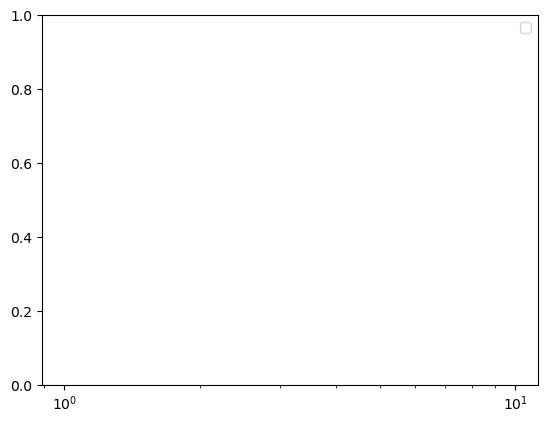

In [19]:
import matplotlib.pyplot as plt

plt.xscale('log')
plt.legend(('ham','spam'))
plt.show()

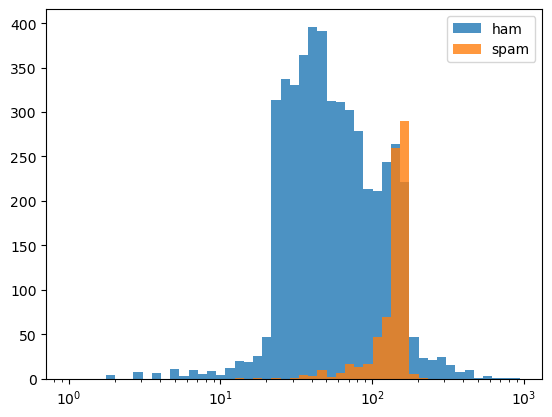

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<font color=green>It looks like there's a small range of values where a message is more likely to be spam than ham.</font>

Now let's look at the `punct` column:

In [21]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

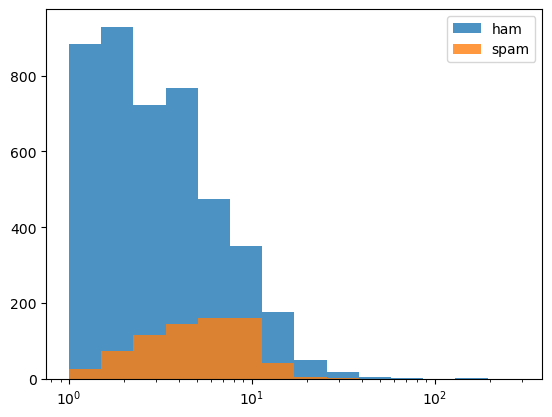

In [22]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<font color=green>This looks even worse - there seem to be no values where one would pick spam over ham. We'll still try to build a machine learning classification model, but we should expect poor results.</font>

# Split the data into train & test sets:

If we wanted to divide the DataFrame into two smaller sets, we could use
> `train, test = train_test_split(df)`

For our purposes let's also set up our Features (X) and Labels (y). The Label is simple - we're trying to predict the `label` column in our data. For Features we'll use the `length` and `punct` columns. *By convention, **X** is capitalized and **y** is lowercase.*

## Selecting features
There are two ways to build a feature set from the columns we want. If the number of features is small, then we can pass those in directly:
> `X = df[['length','punct']]`

If the number of features is large, then it may be easier to drop the Label and any other unwanted columns:
> `X = df.drop(['label','message'], axis=1)`

These operations make copies of **df**, but do not change the original DataFrame in place. All the original data is preserved.

In [24]:
# Create Feature and Label sets
X = df[['length','punct']]  # note the double set of brackets
y = df['label']

## Additional train/test/split arguments:
The default test size for `train_test_split` is 30%. Here we'll assign 33% of the data for testing.<br>
Also, we can set a `random_state` seed value to ensure that everyone uses the same "random" training & testing sets.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (4067, 2)
Testing Data Shape:  (1505, 2)


In [27]:
X_train.head()

,length,punct
2404,73,1
2144,161,5
3101,113,6
5478,25,7
191,72,5


Now we can pass these sets into a series of different training & testing algorithms and compare their results.

___
# Train a Logistic Regression classifier
One of the simplest multi-class classification tools is [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Scikit-learn offers a variety of algorithmic solvers; we'll use [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS). 

In [28]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

## Test the Accuracy of the Model

In [29]:
from sklearn import metrics

predictions = lr_model.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions))

[[1267   36]
 [ 197    5]]


In [31]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['ham','spam'])
df

,0,1
ham,1267,36
spam,197,5


In [32]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['ham','spam'], columns=['ham', 'spam'])

In [33]:
df

,ham,spam
ham,1267,36
spam,197,5


In [34]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1303
        spam       0.12      0.02      0.04       202

    accuracy                           0.85      1505
   macro avg       0.49      0.50      0.48      1505
weighted avg       0.77      0.85      0.80      1505



In [35]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8451827242524917


___
# Train a naïve Bayes classifier:
One of the most common - and successful - classifiers is [naïve Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes).

In [36]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

## Run predictions and report on metrics

In [37]:
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1293   10]
 [ 202    0]]


In [38]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.86      0.99      0.92      1303
        spam       0.00      0.00      0.00       202

    accuracy                           0.86      1505
   macro avg       0.43      0.50      0.46      1505
weighted avg       0.75      0.86      0.80      1505



In [39]:
print(metrics.accuracy_score(y_test,predictions))

0.8591362126245847


___
# Train a support vector machine (SVM) classifier
Among the SVM options available, we'll use [C-Support Vector Classification (SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [40]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

SVC(gamma='auto')

## Run predictions and report on metrics

In [41]:
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1241   62]
 [ 111   91]]


<font color=green>The total number of confusions dropped even further to **209**.</font>

In [42]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1303
        spam       0.59      0.45      0.51       202

    accuracy                           0.89      1505
   macro avg       0.76      0.70      0.72      1505
weighted avg       0.87      0.89      0.88      1505



In [43]:
print(metrics.accuracy_score(y_test,predictions))

0.8850498338870432


<font color=green>And finally we have a model that performs *slightly* better than random chance.</font>